In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
import numpy as np
import tensorflow as tf
from tensorflow import keras

import gensim
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
import numpy as np
import tensorflow as tf
from tensorflow import keras
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
import string

# Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd
data= pd.read_csv('Lemmi.csv')
data

,Unnamed: 0,text,documents_cleaned
0,0,in quello giorno essere impossibile passeggiare .,"['in', 'quello', 'giorno', 'essere', 'impossib..."
1,1,il mattina avere errare per uno ora nel bosche...,"['il', 'mattina', 'avere', 'errare', 'per', 'u..."
2,2,ne essere contentare .,"['ne', 'essere', 'contentare', '.']"
3,3,non mi essere mai piacere il lungo passeggiate...,"['non', 'mi', 'essere', 'mai', 'piacere', 'il'..."
4,4,"eliza , John e georgiana essere aggruppare in ...","['eliza', ',', 'John', 'e', 'georgiana', 'esse..."
...,...,...,...
19797,19797,il paura della morte non offuscare il ultimo o...,"['il', 'paura', 'della', 'morte', 'non', 'offu..."
19798,19798,"il suo stesso parola ne essere pegno : \n\n "" ...","['il', 'suo', 'stesso', 'parola', 'ne', 'esser..."
19799,19799,ogni giorno mi annunciare con sempre grande ch...,"['ogni', 'giorno', 'mi', 'annunciare', 'con', ..."
19800,19800,", e di ora in ora io rispondere con fervore cr...","[',', 'e', 'di', 'ora', 'in', 'ora', 'io', 'ri..."


In [ ]:
from spacy.lang.it.stop_words import STOP_WORDS
def clean(x):
  stop = STOP_WORDS
  words  = [w for w in word_tokenize(x.lower()) if w.isalpha() and w not in stop and w not in string.punctuation]
  return " ".join(words)

In [ ]:
data['clean'] = data['text'].apply(clean)

In [ ]:
data.dropna(subset=['clean'], inplace=True)

In [ ]:
text = data['clean']

In [ ]:
text

0                                  impossibile passeggiare
1        mattina errare boschetto spogliare foglia pran...
2                                               contentare
3        piacere passeggiate freddo penoso tornar notte...
4        eliza john e georgiana aggruppare salotto atto...
                               ...                        
19797    paura morte offuscare st john mente nube cuore...
19798                       parola pegno signore avvertire
19799                annunciare chiarezza sì venire presto
19800    e rispondere fervore crescente amen venire sig...
19801                                                     
Name: clean, Length: 19802, dtype: object

#KMEANS USING TF IDF

In [ ]:
#tfidf vector initililization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(text.values)
tfidf.shape

(19802, 14128)

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(tfidf)
    distortions.append(kmeanModel.inertia_)

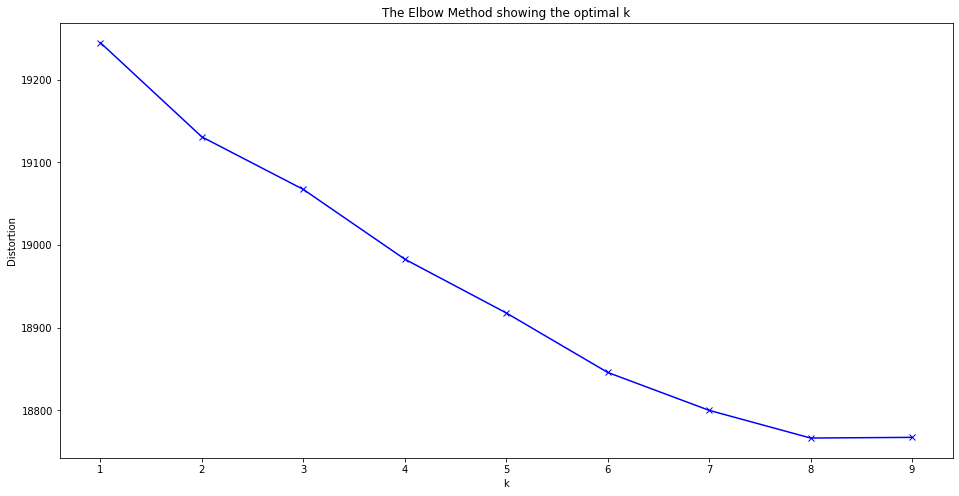

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 8, n_jobs = -1,random_state=99)
model_tf.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [ ]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_

In [ ]:
cluster_center_tf

array([[4.13306728e-05, 3.69838722e-05, 1.99269298e-05, ...,
        2.27462991e-05, 2.58292721e-05, 3.57521755e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
# to understand what kind of words generated as columns by BOW
terms1 = tfidf_vect.get_feature_names()

In [ ]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

In [ ]:
silhouette_score_tf

0.015228119303989202

In [ ]:
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(8):
 print(i)
 for ind in order_centroids[i, :10]:
   print(terms1[ind])

0
potere
stare
volere
dovere
vedere
sentire
parlare
venire
occhio
signora
1
signore
potere
volere
rivers
andare
stare
dare
credere
pensare
mason
2
jane
oh
eyre
volere
venire
stare
signorina
sentire
signore
potere
3
rochester
mr
signore
guardare
vedere
stare
signora
domandare
volere
andare


In [ ]:
# Giving Labels/assigning a cluster to each sentence
df1 = data
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)

,Unnamed: 0,text,documents_cleaned,clean,Tfidf Clus Label
0,0,in quello giorno essere impossibile passeggiare .,"['in', 'quello', 'giorno', 'essere', 'impossib...",impossibile passeggiare,0
1,1,il mattina avere errare per uno ora nel bosche...,"['il', 'mattina', 'avere', 'errare', 'per', 'u...",mattina errare boschetto spogliare foglia pran...,0
2,2,ne essere contentare .,"['ne', 'essere', 'contentare', '.']",contentare,0
3,3,non mi essere mai piacere il lungo passeggiate...,"['non', 'mi', 'essere', 'mai', 'piacere', 'il'...",piacere passeggiate freddo penoso tornar notte...,0
4,4,"eliza , John e georgiana essere aggruppare in ...","['eliza', ',', 'John', 'e', 'georgiana', 'esse...",eliza john e georgiana aggruppare salotto atto...,4


In [ ]:
# Train your own Word2Vec model
i=0
list_of_sent=[]
for sent in data['clean'].values:
    list_of_sent.append(sent.split())

In [ ]:
import gensim
# Training the wor2vec model
w2v_model = Word2Vec.load('word2vec_model_lemmi')

In [ ]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence is stored in this train
for sent in list_of_sent: # for each sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence
    for word in sent: # for each word in a sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(19802, 100)

#AGGLOMERATIVE CLUSTERING

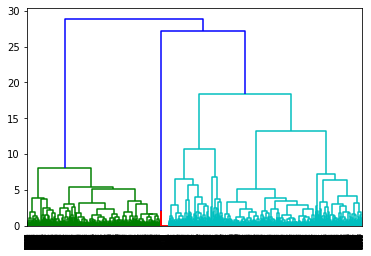

In [ ]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')   
Agg=cluster.fit_predict(sent_vectors)

In [ ]:
# Giving Labels/assigning a cluster to each point/text 
aggdfa = data
aggdfa['Agglomerative Clustering Label'] = cluster.labels_
aggdfa.head(2)

,Unnamed: 0,text,documents_cleaned,clean,Tfidf Clus Label,Word2Vec Label,Doc2Vec Label,BERT Label,Agglomerative Clustering Label
0,0,in quello giorno essere impossibile passeggiare .,"['in', 'quello', 'giorno', 'essere', 'impossib...",impossibile passeggiare,0,0,2,0,4
1,1,il mattina avere errare per uno ora nel bosche...,"['il', 'mattina', 'avere', 'errare', 'per', 'u...",mattina errare boschetto spogliare foglia pran...,0,0,2,0,0


In [ ]:
# How many points belong to each cluster
aggdfa.groupby(['Agglomerative Clustering Label'])['text'].count()

Agglomerative Clustering Label
0    7919
1    2722
2    2492
3     705
4    5473
5     491
Name: text, dtype: int64

In [ ]:
#considers sample of 6 random sentences for cluster 0
# class struggle

print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[0][150]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[0][1253]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[0][370]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[0][400]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[0][2198]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[0][2365]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[0][7210]]['text'])

 nemmeno se essere buono per voi " 

 scrollai il testa ; non potere capire come avere potere essere buono quello gente se essere povero ; e poi imparare a parlare come il povero , acquistare il loro maniera , non avere educazione , crescere come quelle misero donna , che vedere allattare il bimbo e lavare il bucato sulla porta della casupola del villaggio ; no , non essere abbastanza eroico per acquistare il libertà col suo corteo di miseria .
______________________________________________________________________
a causa di uno vestito di velluto rosso e di uno turbante fatto con un scialle indiano , credere di essere imponente come uno imperatrice .
______________________________________________________________________
il direttrice di lowood si sedere davanti alla tavola su cui essere posare il sfera , e riunire intorno a sé il primo classe , incominciare il lezione di geografia ; il classe inferiore essere chiamare dalla altro maestra , e per uno ora continuare il ripetizione di g

In [ ]:
#considers sample of 6 random sentences for cluster 1
#self discovery

print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[1][150]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[1][1253]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[1][898]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[1][487]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[1][970]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[1][1984]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[1][2702]]['text'])

volere domandarvi qualcosa ; avere mai sentire parlare della famiglia di vostro padre " 

  mai .
______________________________________________________________________
ma ce ne essere tanti a questo mondo che non avere amico , che dovere arrangiare per conto proprio e cavare da solo .
______________________________________________________________________
non essere vero che non ci andare , Jane " 

  avere rifiutare di sposare .
______________________________________________________________________
il natura dovere esultare , perché io essere tanto felice !
______________________________________________________________________
come mai Jane essere con me e mi dire di amare " non partire all' improvviso come essere venire " avere paura di non trovare molto domani .
______________________________________________________________________
" essere preoccupata perché stare per entrare in uno mondo nuovo ?
______________________________________________________________________
egli non vede

In [ ]:
#considers sample of 6 random sentences for cluster 2
#amore e matrimonio

print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[2][227]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[2][2000]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[2][846]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[2][997]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[2][759]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[2][1897]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[2][2100]]['text'])

il madre del signore rochester essere uno fairfax , cugina in secondo grado di mio marito ; ma io non avere mai cercare di trar partito da questo parentela ; essa non esistere per me e mi considerare come uno governante qualsiasi .
______________________________________________________________________
essere soltanto io e mr rochester .
______________________________________________________________________
il disperazione aggiungere : 

 " addio per sempre ! "
______________________________________________________________________
pensare al signore rochester !
______________________________________________________________________
 essere crudele nel mio amore ,  mi dire ,  riposatevi uno momento , appoggiatevi a me , Jane .
______________________________________________________________________
" sì , mrs rochester , " dire , " il giovane mrs rochester ... il sposa bambina di fairfax rochester . "
______________________________________________________________________
gridare il mio c

In [ ]:
#considers sample of 6 random sentences for cluster 3

print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[3][16]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[3][426]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[3][104]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[3][48]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[3][511]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[3][161]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[3][670]]['text'])

 ebbene , avere piantare , signorina Jane eyre ; mi potere dire per chi " avere qualche dispiacere " 

  no , signore .
______________________________________________________________________
ancora buonanotte , signore .
______________________________________________________________________
 il avere veduta , ditemi come essere , signora fairfax .
______________________________________________________________________
 benissimo ,  rispondere il signorina temple ,  ne fare di meno .
______________________________________________________________________
uno volta mi essere ripromettere che non lo avere mai molto chiamare zia .
______________________________________________________________________
 vi ringraziare , signore ; mi duole di dare .... 

  oh !
______________________________________________________________________
c' essere da capire però , perché fare uno vitaccia .


In [ ]:
# considers sample of 6 random sentences for cluster 4
# famiglia
# thornfield villa della famiglia dei Rochester dove vive per un periodo 

print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[4][150]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[4][423]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[4][912]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[4][258]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[4][21]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[4][1980]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[4][4598]]['text'])

essere tanto infelice e ogni tanto dire a me stesso : 

  che cosa dovere fare " 

 sentii a uno tratto uno voce chiaro gridare : 

  signorina Jane , dove essere " venire a colazione .
______________________________________________________________________
qui si stare bene sempre ; thornfield essere uno vecchio villa , uno po' trascurare ora , ma sempre rispettabile .
______________________________________________________________________
qui il giovane chiedere molto ampio spiegazione su questo punto , ma il ragazza non fare altro che arrossire , balbettare e sorridere ; il mamma ripetere che avere fare meglio a non andare dalla strega ; il vecchio signore ridere e il giovane fare sempre molto ressa attorno alla signorina .
______________________________________________________________________
io volere che questo ragazza sieno figlia della grazia .
______________________________________________________________________
andare a dire a mamma , ma prima .... 

 egli si slanciare contr

In [ ]:
# considers sample of 6 random sentences for cluster 5


print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[5][150]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[5][423]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[5][300]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[5][258]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[5][21]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[5][480]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[5][312]]['text'])

il fece .
______________________________________________________________________
acconsentii .
______________________________________________________________________
posto !
______________________________________________________________________
quanto avere in tutto , Jane ? "
______________________________________________________________________
per questo no .
______________________________________________________________________
io essere fare per lei ? "
______________________________________________________________________
come ?
